# Honeybee vs Bumblebee
## Image classification
This exercise project seeks to define an algorithm to load and process images and classify honeybees and bumblebees. 

In [1]:
# Used to change filepaths
from pathlib import Path
import os
# We set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

# import numpy to use in this cell
import numpy as np

# import Image from PIL so we can use it later
from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score

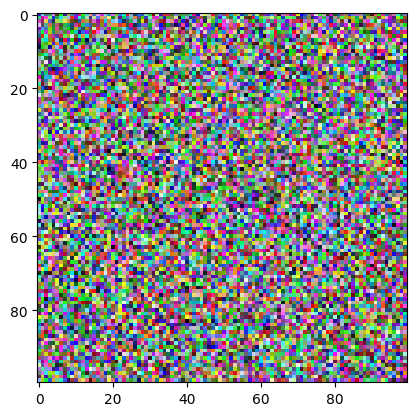

In [2]:
# generate test_data
test_data = np.array(np.random.beta(1,1,size=(100,100,3)))

# display the test_data
plt.imshow(test_data)

The image size is: (100, 100)


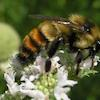

In [3]:
# open the image
img = Image.open('bee_1.jpg')

# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

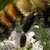

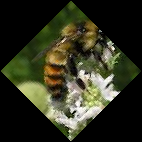

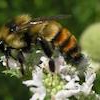

In [4]:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop((25,25,75,75))
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img.rotate(angle=45, expand=25)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Our NumPy array has the shape: (100, 100, 3)


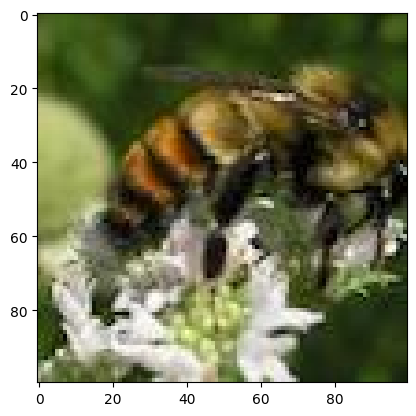

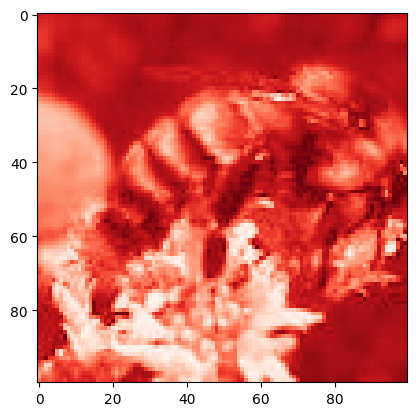

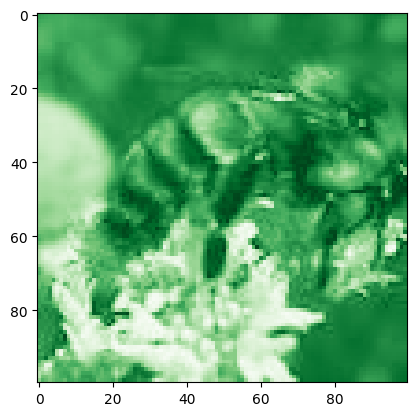

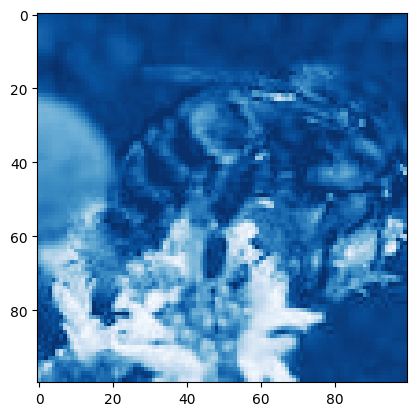

In [5]:
# Turn our image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
img_data_shape = img_data.shape

print("Our NumPy array has the shape: {}".format(img_data_shape))

# plot the data with `imshow` 
plt.imshow(img_data)
plt.show()

# plot the red channel
plt.imshow(img_data[:,:,0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:,:,1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:,:,2], cmap=plt.cm.Blues_r)
plt.show()

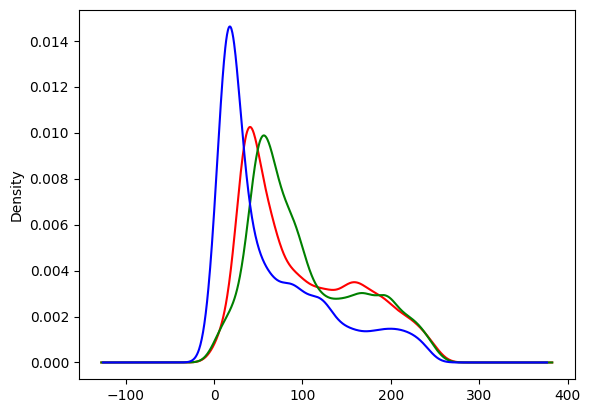

In [6]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r','g','b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:,:,ix],color=color)

    plt.show()
    
plot_rgb(img_data)

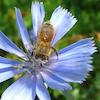

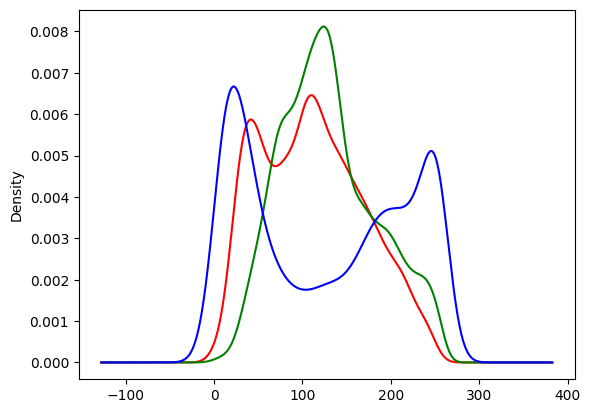

In [7]:
# load bee_12.jpg as honey
honey = Image.open('bee_12.jpg')

# display the honey bee image
display(honey)

# NumPy array of the honey bee image data
honey_data = np.array(honey)

# plot the rgb densities for the honey bee image
plot_rgb(honey_data)

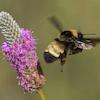

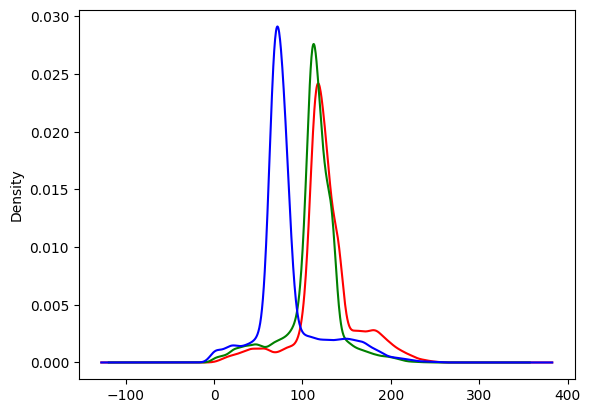

In [8]:
# load bee_12.jpg as honey
bumble = Image.open('bee_3.jpg')

# display the honey bee image
display(bumble)

# NumPy array of the honey bee image data
bumble_data = np.array(bumble)

# plot the rgb densities for the honey bee image
plot_rgb(bumble_data)

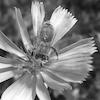

Our NumPy array has the shape: (100, 100)


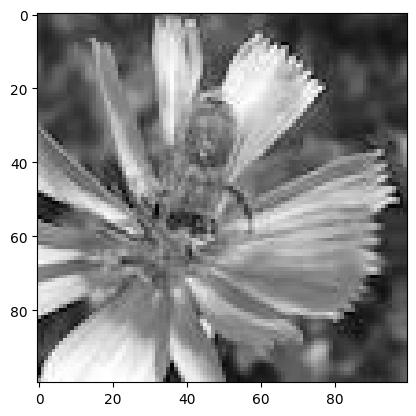

<Axes: ylabel='Density'>

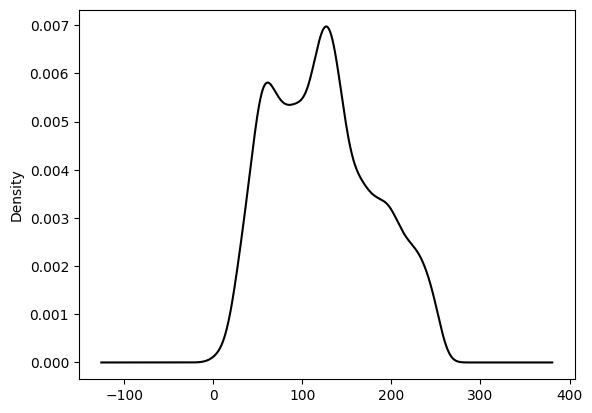

In [9]:
# convert honey to grayscale
honey_bw = honey.convert('L')
display(honey_bw)

# convert the image to a NumPy array
honey_bw_arr = np.array(honey_bw)

# get the shape of the resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Our NumPy array has the shape: {}".format(honey_bw_arr_shape))

# plot the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(honey_bw_arr, 'k')

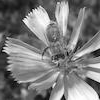

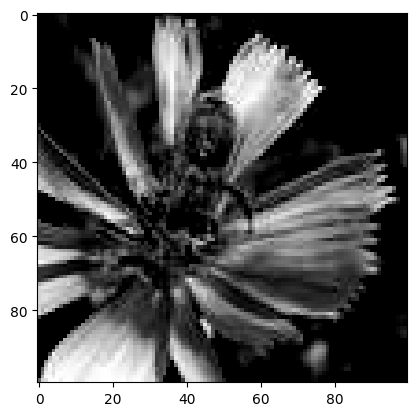

In [10]:
# flip the image left-right with transpose
honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(honey_bw_flip)

# save the flipped image
honey_bw_flip.save('bw_flipped.jpg')

# create higher contrast by reducing range
honey_hc_arr = np.maximum(honey_bw_arr,100)

# show the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
honey_bw_hc = Image.fromarray(honey_hc_arr)

# save the high contrast version
honey_bw_hc.save('bw_hc.jpg')

In [11]:
image_paths = ['bee_1.jpg', 'bee_12.jpg', 'bee_2.jpg', 'bee_3.jpg']

def process_image(path):
    img = Image.open(path)

    # create paths to save files to
    bw_path = "bw_{}.jpg".format(path.stem)
    rcz_path = "rcz_{}.jpg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert('L')
    bw.save(bw_path)

    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = bw.rotate(angle=45).crop((25,25,75,75)).resize((100,100))
    rcz.save(rcz_path)

# for loop over image paths
for img_path in image_paths:
    process_image(Path(img_path))

Creating grayscale version of bee_1.jpg and saving to bw_bee_1.jpg.
Creating rotated, cropped, and zoomed version of bee_1.jpg and saving to rcz_bee_1.jpg.
Creating grayscale version of bee_12.jpg and saving to bw_bee_12.jpg.
Creating rotated, cropped, and zoomed version of bee_12.jpg and saving to rcz_bee_12.jpg.
Creating grayscale version of bee_2.jpg and saving to bw_bee_2.jpg.
Creating rotated, cropped, and zoomed version of bee_2.jpg and saving to rcz_bee_2.jpg.
Creating grayscale version of bee_3.jpg and saving to bw_bee_3.jpg.
Creating rotated, cropped, and zoomed version of bee_3.jpg and saving to rcz_bee_3.jpg.


,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


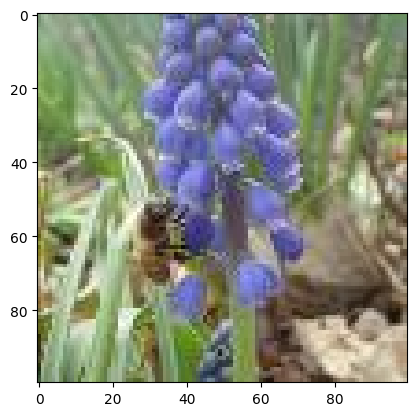

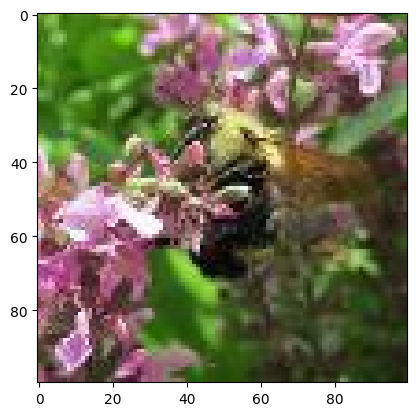

In [12]:
# load the labels using pandas
labels = pd.read_csv("labels.csv", index_col=0)

# show the first five rows of the dataframe using head
display(labels.head(5))

def get_image(row_id, root="images/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

# subset the dataframe to just Apis (genus is 0.0) get the value of the sixth item in the index
apis_row = labels[labels.genus == 0.0].index[5]

# show the corresponding image of an Apis
plt.imshow(get_image(apis_row))
plt.show()

# subset the dataframe to just Bombus (genus is 1.0) get the value of the sixth item in the index
bombus_row = labels[labels.genus == 1.0].index[6]

# show the corresponding image of a Bombus
plt.imshow(get_image(bombus_row))
plt.show()

Color bombus image has shape:  (100, 100, 3)
Grayscale bombus image has shape:  (100, 100)


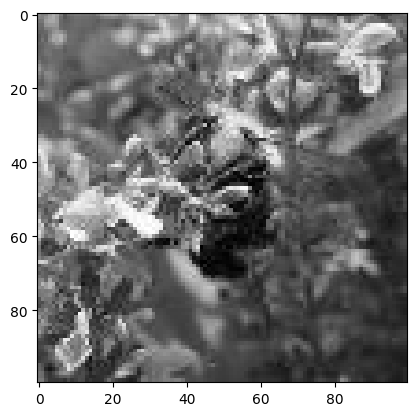

In [13]:
# load a bombus image using our get_image function and bombus_row from the previous cell
bombus = get_image(bombus_row)

# print the shape of the bombus image
print('Color bombus image has shape: ', bombus.shape)

# convert the bombus image to grayscale
gray_bombus = rgb2gray(bombus)

# show the grayscale image
plt.imshow(gray_bombus, cmap=mpl.cm.gray)

# grayscale bombus image only has one channel
print('Grayscale bombus image has shape: ', gray_bombus.shape)

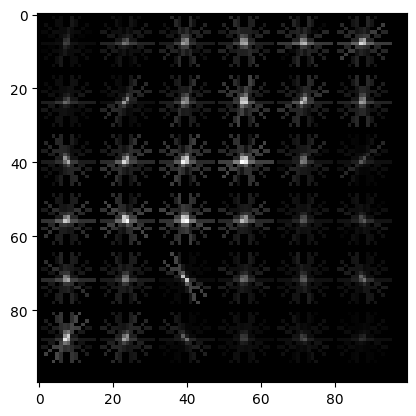

In [14]:
# run HOG using our grayscale bombus image
hog_features, hog_image = hog(gray_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a gray colormap
plt.imshow(hog_image, cmap=mpl.cm.gray)

In [15]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to grayscale
    gray_image = rgb2gray(img)
    # get HOG features from grayscale image
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack((color_features,hog_features))
    return flat_features

bombus_features = create_features(bombus)

# print shape of bombus_features
print(bombus_features.shape)

(31296,)


,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


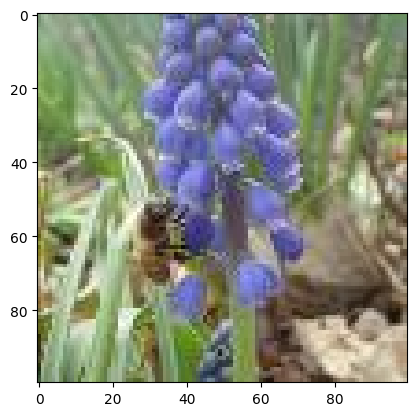

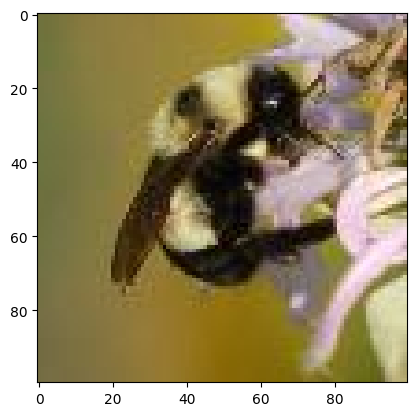

In [16]:
# load the labels using pandas
labels = pd.read_csv("labels.csv", index_col=0)

# show the first five rows of the dataframe using head
display(labels.head(5))

def get_image(row_id, root="images/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

# subset the dataframe to just Apis (genus is 0.0) get the value of the sixth item in the index
apis_row = labels[labels.genus == 0.0].index[5]

# show the corresponding image of an Apis
plt.imshow(get_image(apis_row))
plt.show()

# subset the dataframe to just Bombus (genus is 1.0) get the value of the sixth item in the index
bombus_row = labels[labels.genus == 1.0].index[5]

# show the corresponding image of a Bombus
plt.imshow(get_image(bombus_row))
plt.show()

Color bombus image has shape:  (100, 100, 3)
Grayscale bombus image has shape:  (100, 100)


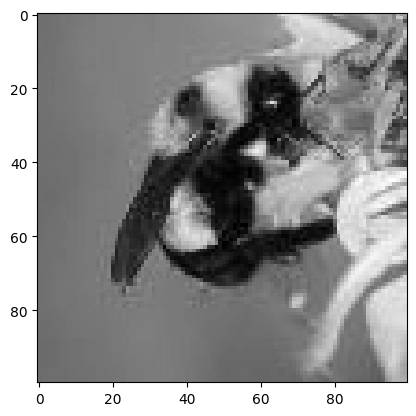

In [17]:
# load a bombus image using our get_image function and bombus_row from the previous cell
bombus = get_image(bombus_row)

# print the shape of the bombus image
print('Color bombus image has shape: ', bombus.shape)

# convert the bombus image to grayscale
gray_bombus = rgb2gray(bombus)

# show the grayscale image
plt.imshow(gray_bombus, cmap=mpl.cm.gray)

# grayscale bombus image only has one channel
print('Grayscale bombus image has shape: ', gray_bombus.shape)

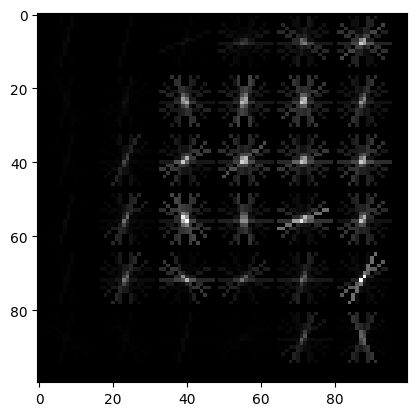

In [18]:
# run HOG using our grayscale bombus image
hog_features, hog_image = hog(gray_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a gray colormap
plt.imshow(hog_image, cmap=mpl.cm.gray)

In [19]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to grayscale
    gray_image = rgb2gray(img)
    # get HOG features from grayscale image
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack((color_features,hog_features))
    return flat_features

bombus_features = create_features(bombus)

# print shape of bombus_features
print(bombus_features.shape)

(31296,)


In [26]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        # load image
        img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)

In [30]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix,
                                                    labels.genus.values,
                                                    test_size=.3,
                                                    random_state=1234123)

# look at the distribution of labels in the train set
pd.Series(y_train).value_counts()

1.0    175
0.0    175
Name: count, dtype: int64

In [31]:
# get shape of our training features
print('Training features matrix shape is: ', X_train.shape)

# define standard scaler
ss = StandardScaler()

# fit the scaler and transform the training features
train_stand = ss.fit_transform(X_train)

# transform the test features
test_stand = ss.transform(X_test)

# look at the new shape of the standardized feature matrices
print('Standardized training features matrix shape is: ', train_stand.shape)
print('Standardized test features matrix shape is: ', test_stand.shape)

Training features matrix shape is:  (350, 31296)
Standardized training features matrix shape is:  (350, 31296)
Standardized test features matrix shape is:  (150, 31296)


In [41]:
# Instantiate a PCA object with 350 components
pca = PCA(n_components=350)

# use fit_transform on our standardized training features
X_train = pca.fit_transform(train_stand)

# use transform on our standardized test features
X_test = pca.transform(test_stand)

# look at the new shape of the transformed matrices
print('Training features matrix is: ', X_train.shape)
print('Test features matrix is: ', X_test.shape)

Training features matrix is:  (350, 350)
Test features matrix is:  (150, 350)


In [42]:
# define support vector classifier
svm = SVC(kernel='linear',probability=True, random_state=42)

# fit model
svm.fit(X_train,y_train)

# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_pred,y_test)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.6866666666666666


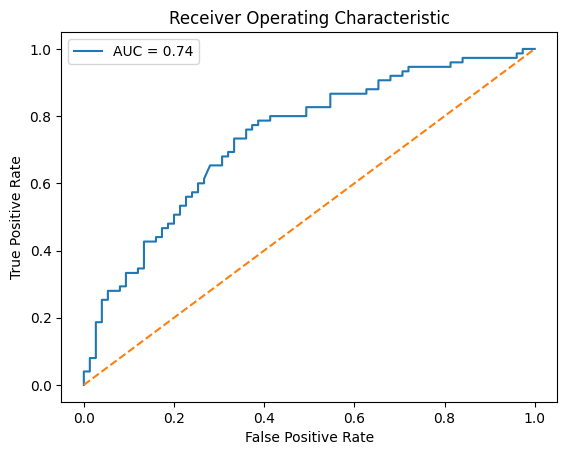

In [44]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:,1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate,true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');